In [131]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


In [133]:
from matplotlib import pyplot as plt


In [135]:
df=pd.read_csv('car_prices.csv')

In [137]:
df.head()

,car_id,mileage,selling_price
0,A001,126958,9734
1,A002,151867,8775
2,A003,136932,3928
3,A004,108694,12454
4,A005,124879,6634


In [139]:
df.shape

(300, 3)

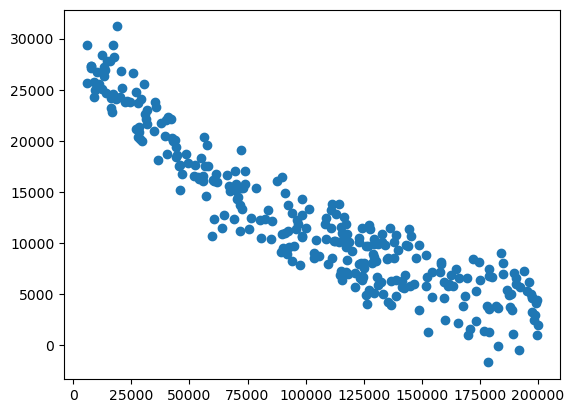

In [141]:
plt.scatter(df.mileage,df.selling_price)

In [142]:
X=df[['mileage']]
y=df['selling_price']

In [143]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [144]:
X.shape

(300, 1)

In [146]:
X_train.shape

(210, 1)

In [170]:
poly=PolynomialFeatures(degree=2)

In [172]:
ploy_X_train=poly.fit_transform(X_train)

In [174]:
poly_X_test=poly.transform(X_test)

In [176]:
ploy_X_train[:4]

array([[1.00000000e+00, 7.85300000e+04, 6.16696090e+09],
       [1.00000000e+00, 1.41330000e+05, 1.99741689e+10],
       [1.00000000e+00, 5.79950000e+04, 3.36342002e+09],
       [1.00000000e+00, 1.03506000e+05, 1.07134920e+10]])

In [178]:
poly_X_test[:4]

array([[1.00000000e+00, 1.98075000e+05, 3.92337056e+10],
       [1.00000000e+00, 1.96785000e+05, 3.87243362e+10],
       [1.00000000e+00, 1.91892000e+05, 3.68225397e+10],
       [1.00000000e+00, 9.24980000e+04, 8.55588000e+09]])

In [180]:
Linear_model=LinearRegression()

In [182]:
Linear_model.fit(ploy_X_train,y_train)

LinearRegression()

In [192]:
Linear_model.predict(poly_X_test)

array([ 4605.32277107,  4615.73994128,  4673.03692998, 11930.28224008,
       11728.34596775,  8381.79460137, 15811.88510713,  7040.71953442,
        9242.09682184, 18712.26916005, 22921.8267238 ,  8262.89190094,
       17535.37825269,  8640.2996987 , 11251.52168054,  4594.41844713,
       14919.88122524,  9044.00882781,  6057.20769596, 10945.55706392,
       27694.37752336,  4732.58342358,  7893.57068806, 20498.49139037,
       24769.69817485, 16504.90049084, 21460.33322576, 25164.43114223,
        5822.52547924,  5671.63734167, 15213.48372356, 27305.08833635,
       27292.60803378,  4706.48245857, 26231.9017746 , 11716.68450529,
        6839.44049024, 17473.49778629, 25338.37006649, 10460.98319806,
       17864.66964255, 19425.54703566,  4967.3411717 , 17940.59255118,
       11427.98922016,  9641.57793146, 20509.32668316,  5150.01366499,
       15263.34543015,  4735.75545721,  4610.16579898,  9584.04564463,
       11176.97171771, 25307.45296715,  6383.66478031,  8971.38109083,
      

In [190]:
y_test

203     2450
266     5020
152     -511
9      11129
233     8252
       ...  
114    23712
118    14632
72     22119
15     15148
10      8318
Name: selling_price, Length: 90, dtype: int64

In [188]:
Linear_model.score(poly_X_test,y_test)

0.8873098856841356

In [202]:
X_range=np.linspace(X['mileage'].min(),X['mileage'].max(),300).reshape(-1,1)

In [196]:
X_range

array([  5769.        ,   6417.95317726,   7066.90635452,   7715.85953177,
         8364.81270903,   9013.76588629,   9662.71906355,  10311.6722408 ,
        10960.62541806,  11609.57859532,  12258.53177258,  12907.48494983,
        13556.43812709,  14205.39130435,  14854.34448161,  15503.29765886,
        16152.25083612,  16801.20401338,  17450.15719064,  18099.11036789,
        18748.06354515,  19397.01672241,  20045.96989967,  20694.92307692,
        21343.87625418,  21992.82943144,  22641.7826087 ,  23290.73578595,
        23939.68896321,  24588.64214047,  25237.59531773,  25886.54849498,
        26535.50167224,  27184.4548495 ,  27833.40802676,  28482.36120401,
        29131.31438127,  29780.26755853,  30429.22073579,  31078.17391304,
        31727.1270903 ,  32376.08026756,  33025.03344482,  33673.98662207,
        34322.93979933,  34971.89297659,  35620.84615385,  36269.7993311 ,
        36918.75250836,  37567.70568562,  38216.65886288,  38865.61204013,
        39514.56521739,  

In [206]:
X_range_poly=poly.transform(X_range)

C:\Users\mahim\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [210]:
X_range_poly[:4]

array([[1.00000000e+00, 5.76900000e+03, 3.32813610e+07],
       [1.00000000e+00, 6.41795318e+03, 4.11901230e+07],
       [1.00000000e+00, 7.06690635e+03, 4.99411654e+07],
       [1.00000000e+00, 7.71585953e+03, 5.95344883e+07]])

In [212]:
y_range_predict=Linear_model.predict(X_range_poly)

In [214]:
y_range_predict

array([27751.99405239, 27600.7691345 , 27450.0393497 , 27299.80469802,
       27150.06517943, 27000.82079395, 26852.07154157, 26703.81742229,
       26556.05843611, 26408.79458304, 26262.02586306, 26115.7522762 ,
       25969.97382243, 25824.69050176, 25679.9023142 , 25535.60925974,
       25391.81133839, 25248.50855013, 25105.70089498, 24963.38837293,
       24821.57098398, 24680.24872814, 24539.42160539, 24399.08961575,
       24259.25275921, 24119.91103578, 23981.06444544, 23842.71298821,
       23704.85666409, 23567.49547306, 23430.62941514, 23294.25849031,
       23158.3826986 , 23023.00203998, 22888.11651446, 22753.72612205,
       22619.83086274, 22486.43073654, 22353.52574343, 22221.11588343,
       22089.20115653, 21957.78156273, 21826.85710204, 21696.42777445,
       21566.49357995, 21437.05451857, 21308.11059028, 21179.6617951 ,
       21051.70813302, 20924.24960404, 20797.28620816, 20670.81794539,
       20544.84481572, 20419.36681915, 20294.38395568, 20169.89622532,
      

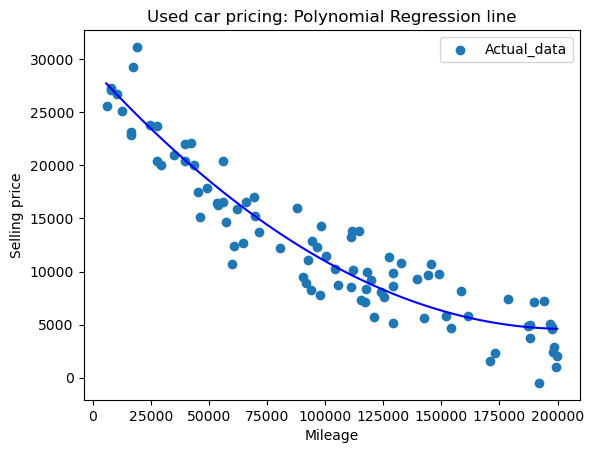

In [228]:
plt.scatter(X_test['mileage'],y_test,label='Actual_data')
plt.plot(X_range,y_range_predict,color='Blue')
plt.title('Used car pricing: Polynomial Regression line')
plt.xlabel('Mileage')
plt.ylabel('Selling price')
plt.legend()
plt.show()